In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving car_evaluation.csv to car_evaluation.csv


{'car_evaluation.csv': b'vhigh,vhigh,2,2,small,low,unacc\r\nvhigh,vhigh,2,2,small,med,unacc\r\nvhigh,vhigh,2,2,small,high,unacc\r\nvhigh,vhigh,2,2,med,low,unacc\r\nvhigh,vhigh,2,2,med,med,unacc\r\nvhigh,vhigh,2,2,med,high,unacc\r\nvhigh,vhigh,2,2,big,low,unacc\r\nvhigh,vhigh,2,2,big,med,unacc\r\nvhigh,vhigh,2,2,big,high,unacc\r\nvhigh,vhigh,2,4,small,low,unacc\r\nvhigh,vhigh,2,4,small,med,unacc\r\nvhigh,vhigh,2,4,small,high,unacc\r\nvhigh,vhigh,2,4,med,low,unacc\r\nvhigh,vhigh,2,4,med,med,unacc\r\nvhigh,vhigh,2,4,med,high,unacc\r\nvhigh,vhigh,2,4,big,low,unacc\r\nvhigh,vhigh,2,4,big,med,unacc\r\nvhigh,vhigh,2,4,big,high,unacc\r\nvhigh,vhigh,2,more,small,low,unacc\r\nvhigh,vhigh,2,more,small,med,unacc\r\nvhigh,vhigh,2,more,small,high,unacc\r\nvhigh,vhigh,2,more,med,low,unacc\r\nvhigh,vhigh,2,more,med,med,unacc\r\nvhigh,vhigh,2,more,med,high,unacc\r\nvhigh,vhigh,2,more,big,low,unacc\r\nvhigh,vhigh,2,more,big,med,unacc\r\nvhigh,vhigh,2,more,big,high,unacc\r\nvhigh,vhigh,3,2,small,low,unac

In [3]:
df=pd.read_csv("car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [8]:
df.shape

(1727, 7)

In [9]:
#Rename column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
#Frequency distribution of values in variables
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [14]:
#Summary of variables
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [15]:
#Missing values in variables
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
#Declare feature vector and target variable
X = df.drop(['class'], axis=1)

y = df['class']

In [17]:
#Split data into separate training and test set
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

##Feature Engineering

In [19]:
# check data types in X_train

X_train.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [20]:
#Encode categorical variables
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [22]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [23]:
# import category encoders

import category_encoders as ce

In [24]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [26]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


###Random Forest Classifier model with default parameters

In [28]:

# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier


# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)


# fit the model
rfc.fit(X_train, y_train)


# Predict the Test set results
y_pred = rfc.predict(X_test)


# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


###Random Forest Classifier model with parameter n_estimators=100

In [29]:


# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
rfc_100.fit(X_train, y_train)


# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


In [30]:
#Find important features with Random Forest model

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

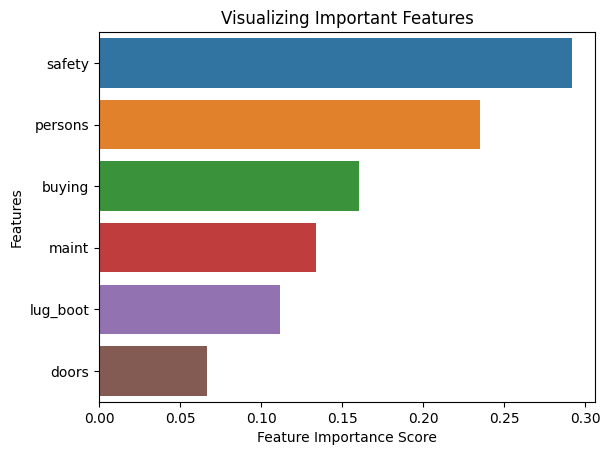

In [32]:
#Visualize feature scores of the features

# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)


# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')



# Add title to the graph
plt.title("Visualizing Important Features")



# Visualize the graph
plt.show()


##Build Random Forest model on selected features

In [33]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [34]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [35]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [37]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)


# fit the model to the training set
clf.fit(X_train, y_train)


# Predict on the test set results
y_pred = clf.predict(X_test)



# Check accuracy score
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


##Confusion matrix

In [39]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


##Classification Report

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570

